In [16]:
import mmcv
import cv2
import numpy as np
from tqdm import tqdm
from pathlib import Path
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('../data/larp/sjtu_larp_cloudy/doorplate/positive_doorplate/IMG_20230317_161650.jpg')

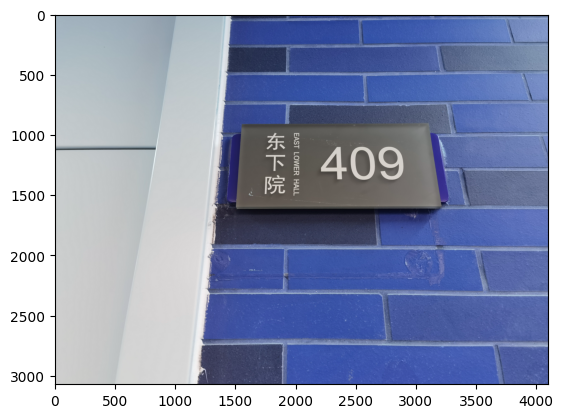

In [3]:
plt.imshow(img)

In [4]:
h,w = img.shape[:2]

In [5]:
w/h

1.3333333333333333

In [7]:
5/2

2.5

In [10]:
def crop_by_ratio(img, ratio):
    h,w = img.shape[:2]
    ori_ratio = w/h
    if ori_ratio == ratio:
        return img
    if ori_ratio > ratio:
        new_w = int(h*ratio+0.5)
        return img[:, (w-new_w)//2:(w-new_w)//2+new_w-1]
    else:
        new_h = int(w/ratio+0.5)
        return img[(h-new_h)//2:(h-new_h)//2+new_h-1,:]

In [11]:
new_img = crop_by_ratio(img, 9/16)

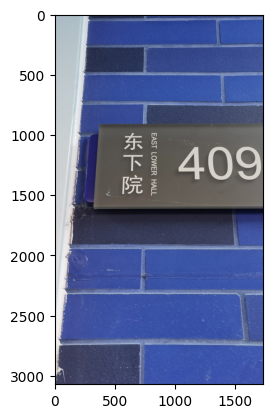

In [12]:
plt.imshow(new_img)

In [ ]:
mmcv.imrescale()

In [23]:
def aug_portrait(src_dir, dst_dir, scale=-1):
    src_dir = Path(src_dir)
    dst_dir = Path(dst_dir)
    dst_dir.mkdir(exist_ok=True, parents=True)
    img_list = list(src_dir.glob('*.jpg'))+list(src_dir.glob('*.png'))
    for p in tqdm(img_list):
        img = cv2.imread(str(p))
        crop_img = crop_by_ratio(img, np.random.choice((9/16,1.,3/4)))
        if scale>0:
            crop_img = mmcv.imrescale(crop_img, (scale, scale))
        cv2.imwrite(str(dst_dir/p.name), crop_img)

In [24]:
src_dir = '/home/pickittwice/data/larp/larp/sjtu_larp_cloudy/doorplate/positive_doorplate/'
dst_dir = '/home/pickittwice/data/larp/larp/sjtu_larp_cloudy/doorplate/positive_doorplate_cropaug'
aug_portrait(src_dir, dst_dir, 1024)

100%|██████████| 34/34 [00:02<00:00, 12.99it/s]


In [25]:
src_dir = '/home/pickittwice/data/larp/larp/sjtu_larp_cloudy/doorplate/positive_video//'
dst_dir = '/home/pickittwice/data/larp/larp/sjtu_larp_cloudy/doorplate/positive_video_cropaug'
aug_portrait(src_dir, dst_dir, 1024)

100%|██████████| 135/135 [00:05<00:00, 23.93it/s]
